In [ ]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import sys
!{sys.executable} -m pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_excel("Ogrenci_Performans.xlsx")

categorical_columns = ["Cinsiyet", "Ebeveyn Egitim Seviyesi", "Okul Yemekhanesi", "Ozel Ders"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df["Genel_Basari"] = df[["Matematik", "Okuma", "Yazma"]].mean(axis=1)

df.head()


,Cinsiyet,Ebeveyn Egitim Seviyesi,Okul Yemekhanesi,Ozel Ders,Matematik,Okuma,Yazma,Genel_Basari
0,1,0,1,1,72,72,74,72.666667
1,1,2,1,0,69,90,88,82.333333
2,1,3,1,1,90,95,93,92.666667
3,0,2,0,1,47,57,44,49.333333
4,0,2,1,1,76,78,75,76.333333


In [7]:
X = df[["Ozel Ders"]]
y = df["Genel_Basari"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, tree_preds))
print("Decision Tree R2:", r2_score(y_test, tree_preds))
print("Linear Regression MSE:", mean_squared_error(y_test, linear_preds))
print("Linear Regression R2:", r2_score(y_test, linear_preds))


Decision Tree MSE: 211.21024532509728
Decision Tree R2: 0.014723944086287521
Linear Regression MSE: 211.21024532509728
Linear Regression R2: 0.014723944086287521


In [8]:
features = ["Cinsiyet", "Ebeveyn Egitim Seviyesi", "Okul Yemekhanesi", "Ozel Ders"]
X_all = df[features]
y_all = df["Genel_Basari"]

tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_all, y_all)

importance = pd.Series(tree.feature_importances_, index=features).sort_values(ascending=False)
importance


Okul Yemekhanesi           0.354991
Ozel Ders                  0.291768
Ebeveyn Egitim Seviyesi    0.244419
Cinsiyet                   0.108822
dtype: float64

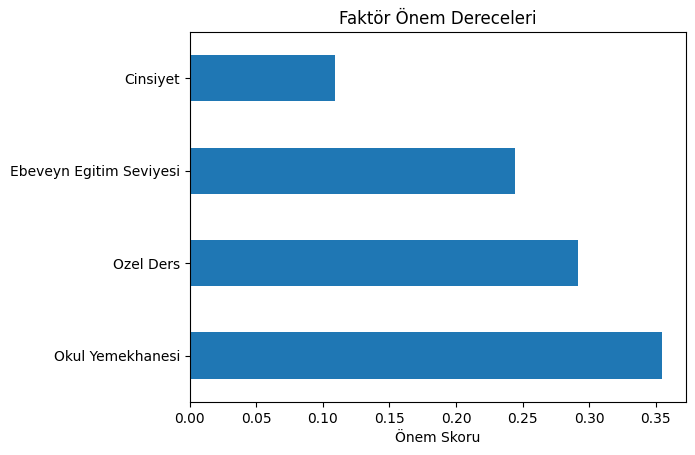

In [9]:
importance.plot(kind="barh")
plt.title("Faktör Önem Dereceleri")
plt.xlabel("Önem Skoru")
plt.show()


In [10]:
X_read = df[["Okuma"]]
y_write = df["Yazma"]
y_math = df["Matematik"]

model_write = LinearRegression().fit(X_read, y_write)
model_math = LinearRegression().fit(X_read, y_math)

print("Okuma - Yazma R2:", model_write.score(X_read, y_write))
print("Okuma - Matematik R2:", model_math.score(X_read, y_math))

print("Okuma - Yazma korelasyon:", df["Okuma"].corr(df["Yazma"]))
print("Okuma - Matematik korelasyon:", df["Okuma"].corr(df["Matematik"]))


Okuma - Yazma R2: 0.9112574888913137
Okuma - Matematik R2: 0.668436506450109
Okuma - Yazma korelasyon: 0.9545980771462479
Okuma - Matematik korelasyon: 0.817579663672055
